## Gradient Descent and Backpropagation

In this assignment, we will learn about gradient descent and backpropagation algorithms. We will create a neural network and tweak some of the parameters in SGD.

In [1]:
import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

from sklearn.model_selection import train_test_split

%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

Let's use the data we processed in the titanic assigment and load it below.

In [2]:
titanic = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic_processed.csv')

In [3]:
titanic.head()

,Survived,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,0,1,0,1,0,0,1
1,1,1,0,1,0,0,1,0,1,0,0
2,1,0,0,0,0,1,1,0,0,0,1
3,1,1,0,1,0,0,1,0,0,0,1
4,0,0,0,0,0,1,0,1,0,0,1


Split the data into train and test with 20% of data in test.

In [4]:
# Answer below
X = titanic.drop('Survived', 1)
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Create a model with 5 layers - The first layer should be of unit size 128 and input shape with the shape of the input and the last layer should be of size 1. The hidden layers should be of size 64, 32, and 32, respectively. Use a sigmoid activation.

In [5]:
# Answer below
model = Sequential()

model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 12,833
Trainable params: 12,833
Non-trainable params: 0
_________________________________________________________________


Initialize an SGD optimizer with learning rate 0.05. Note that in older versions of keras, we use `lr` instead of `learning_rate`.

In [6]:
# Answer below:
sgd = SGD(lr=0.05)

compile and fit the model using the optimizer you initialized above. Use a batch size of 100 and 50 epochs

In [7]:
# Answer below:
model.compile(optimizer=sgd, loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=100, epochs=50,
                    validation_data = (X_test, y_test), verbose=1)

Epoch 1/50
8/8 [==============================] - 2s 64ms/step - loss: 0.6800 - accuracy: 0.5975 - val_loss: 0.6513 - val_accuracy: 0.6629
Epoch 2/50
8/8 [==============================] - 0s 10ms/step - loss: 0.6536 - accuracy: 0.6160 - val_loss: 0.6297 - val_accuracy: 0.6629
Epoch 3/50
8/8 [==============================] - 0s 8ms/step - loss: 0.6308 - accuracy: 0.6176 - val_loss: 0.6188 - val_accuracy: 0.6742
Epoch 4/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6261 - accuracy: 0.6097 - val_loss: 0.6041 - val_accuracy: 0.6910
Epoch 5/50
8/8 [==============================] - 0s 9ms/step - loss: 0.5999 - accuracy: 0.6792 - val_loss: 0.5885 - val_accuracy: 0.7360
Epoch 6/50
8/8 [==============================] - 0s 9ms/step - loss: 0.5975 - accuracy: 0.6772 - val_loss: 0.5718 - val_accuracy: 0.7640
Epoch 7/50
8/8 [==============================] - 0s 8ms/step - loss: 0.5731 - accuracy: 0.7433 - val_loss: 0.5536 - val_accuracy: 0.7921
Epoch 8/50
8/8 [================

In [8]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.5251 - accuracy: 0.7640


[0.5251257419586182, 0.7640449404716492]

Now use the same batch size, but fit your model using 500 epochs. Is there a difference in performance?

In [9]:
# Answer below:
model.compile(optimizer=sgd, loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=100, epochs=500,
                    validation_data = (X_test, y_test), verbose=1)

Epoch 1/500
8/8 [==============================] - 1s 39ms/step - loss: 0.4005 - accuracy: 0.8086 - val_loss: 0.5068 - val_accuracy: 0.7472
Epoch 2/500
8/8 [==============================] - 0s 10ms/step - loss: 0.3942 - accuracy: 0.8110 - val_loss: 0.4898 - val_accuracy: 0.7865
Epoch 3/500
8/8 [==============================] - 0s 10ms/step - loss: 0.4005 - accuracy: 0.8225 - val_loss: 0.5145 - val_accuracy: 0.8034
Epoch 4/500
8/8 [==============================] - 0s 10ms/step - loss: 0.4344 - accuracy: 0.8065 - val_loss: 0.4890 - val_accuracy: 0.7921
Epoch 5/500
8/8 [==============================] - 0s 9ms/step - loss: 0.4145 - accuracy: 0.8179 - val_loss: 0.5251 - val_accuracy: 0.7416
Epoch 6/500
8/8 [==============================] - 0s 10ms/step - loss: 0.3998 - accuracy: 0.8131 - val_loss: 0.4958 - val_accuracy: 0.7697
Epoch 7/500
8/8 [==============================] - 0s 9ms/step - loss: 0.3991 - accuracy: 0.8190 - val_loss: 0.5565 - val_accuracy: 0.6966
Epoch 8/500
8/8 [=====

In [10]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.7086 - accuracy: 0.6854


[0.7086278796195984, 0.6853932738304138]

Now use a batch size of 200 and 200 epochs. Have you observed a significant difference in performance?

In [11]:
# Answer below:
model.compile(optimizer=sgd, loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=200, epochs=200,
                    validation_data = (X_test, y_test), verbose=1)

Epoch 1/200
4/4 [==============================] - 1s 102ms/step - loss: 0.3691 - accuracy: 0.8412 - val_loss: 0.6165 - val_accuracy: 0.7697
Epoch 2/200
4/4 [==============================] - 0s 17ms/step - loss: 0.3441 - accuracy: 0.8481 - val_loss: 0.6257 - val_accuracy: 0.7697
Epoch 3/200
4/4 [==============================] - 0s 13ms/step - loss: 0.3386 - accuracy: 0.8537 - val_loss: 0.6196 - val_accuracy: 0.7697
Epoch 4/200
4/4 [==============================] - 0s 14ms/step - loss: 0.3596 - accuracy: 0.8411 - val_loss: 0.6285 - val_accuracy: 0.7697
Epoch 5/200
4/4 [==============================] - 0s 13ms/step - loss: 0.3546 - accuracy: 0.8374 - val_loss: 0.6199 - val_accuracy: 0.7697
Epoch 6/200
4/4 [==============================] - 0s 15ms/step - loss: 0.3542 - accuracy: 0.8383 - val_loss: 0.6149 - val_accuracy: 0.7753
Epoch 7/200
4/4 [==============================] - 0s 15ms/step - loss: 0.3461 - accuracy: 0.8458 - val_loss: 0.6112 - val_accuracy: 0.7640
Epoch 8/200
4/4 [==

In [12]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.6588 - accuracy: 0.7697


[0.6587988138198853, 0.7696629166603088]

The performance for each is more or less the same.

Now create a model with 7 layers. The model should have an input layer with unit size 128, then hidden layers of size 128, 64, 64, 32, 32, and an output layer of size 1. Use a sigmoid activation.

In [13]:
# Answer below
model = Sequential()

model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               1408      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

Fit and compile the model using the SGD optimizer you previously defined, batch size = 80 and epochs = 200

In [14]:
# Answer below:
model.compile(optimizer=sgd, loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=80, epochs=200,
                    validation_data = (X_test, y_test), verbose=1)

Epoch 1/200
9/9 [==============================] - 1s 26ms/step - loss: 0.6917 - accuracy: 0.4818 - val_loss: 0.6695 - val_accuracy: 0.6573
Epoch 2/200
9/9 [==============================] - 0s 7ms/step - loss: 0.6735 - accuracy: 0.6072 - val_loss: 0.6540 - val_accuracy: 0.6629
Epoch 3/200
9/9 [==============================] - 0s 6ms/step - loss: 0.6633 - accuracy: 0.6015 - val_loss: 0.6412 - val_accuracy: 0.6629
Epoch 4/200
9/9 [==============================] - 0s 7ms/step - loss: 0.6494 - accuracy: 0.6044 - val_loss: 0.6285 - val_accuracy: 0.6629
Epoch 5/200
9/9 [==============================] - 0s 7ms/step - loss: 0.6407 - accuracy: 0.5969 - val_loss: 0.6156 - val_accuracy: 0.6629
Epoch 6/200
9/9 [==============================] - 0s 8ms/step - loss: 0.6317 - accuracy: 0.5902 - val_loss: 0.6023 - val_accuracy: 0.6629
Epoch 7/200
9/9 [==============================] - 0s 7ms/step - loss: 0.6069 - accuracy: 0.6185 - val_loss: 0.5891 - val_accuracy: 0.7135
Epoch 8/200
9/9 [=========

In [15]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.5939 - accuracy: 0.7753


[0.5939145088195801, 0.7752808928489685]

Define a new SGD optimizer with a learning rate of 0.001

In [16]:
# Answer below:
sgd = SGD(lr=0.001)

Fit and compile the model using this SGD optimizer, batch size = 80 and epochs = 200. Compare to previous results. What do you think went wrong and why?

In [17]:
# Answer below:
model.compile(optimizer=sgd, loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=80, epochs=200,
                    validation_data = (X_test, y_test), verbose=1)

Epoch 1/200
9/9 [==============================] - 1s 28ms/step - loss: 0.3386 - accuracy: 0.8619 - val_loss: 0.5943 - val_accuracy: 0.7753
Epoch 2/200
9/9 [==============================] - 0s 8ms/step - loss: 0.3488 - accuracy: 0.8550 - val_loss: 0.5947 - val_accuracy: 0.7753
Epoch 3/200
9/9 [==============================] - 0s 8ms/step - loss: 0.3707 - accuracy: 0.8404 - val_loss: 0.5949 - val_accuracy: 0.7753
Epoch 4/200
9/9 [==============================] - 0s 8ms/step - loss: 0.3877 - accuracy: 0.8333 - val_loss: 0.5953 - val_accuracy: 0.7753
Epoch 5/200
9/9 [==============================] - 0s 7ms/step - loss: 0.3544 - accuracy: 0.8502 - val_loss: 0.5954 - val_accuracy: 0.7753
Epoch 6/200
9/9 [==============================] - 0s 8ms/step - loss: 0.3483 - accuracy: 0.8523 - val_loss: 0.5956 - val_accuracy: 0.7753
Epoch 7/200
9/9 [==============================] - 0s 8ms/step - loss: 0.3534 - accuracy: 0.8595 - val_loss: 0.5959 - val_accuracy: 0.7753
Epoch 8/200
9/9 [=========

In [18]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.6074 - accuracy: 0.7697


[0.6074440479278564, 0.7696629166603088]

Look at the prediction for the training and test data. Print the confusion matrix for the test data.

In [19]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [28]:
# model.predict(X_test).flatten()


array([1.4388497e-01, 4.3972093e-01, 1.2865044e-01, 4.0278032e-02,
       9.7239733e-01, 4.6241185e-01, 7.5176269e-02, 9.9428034e-01,
       1.4287920e-01, 3.5167030e-01, 1.2865044e-01, 5.5044424e-02,
       2.1992479e-01, 4.6241185e-01, 3.5167030e-01, 7.6714277e-02,
       9.7928762e-01, 4.0278032e-02, 1.4287920e-01, 5.5044424e-02,
       9.6114045e-03, 1.4287920e-01, 5.5362934e-01, 1.4287920e-01,
       7.0019597e-01, 3.5167030e-01, 3.1406957e-01, 1.4287920e-01,
       1.4287920e-01, 9.7239733e-01, 3.7345842e-01, 8.6091733e-01,
       8.4491438e-01, 1.4287920e-01, 4.6241185e-01, 3.5167030e-01,
       1.4287920e-01, 7.6714277e-02, 7.6123524e-01, 5.9713628e-02,
       9.2180479e-01, 7.6123524e-01, 8.9462027e-03, 2.5781515e-01,
       1.4287920e-01, 7.0627874e-01, 9.2180479e-01, 9.9548608e-01,
       9.6284270e-01, 3.7345842e-01, 8.7807357e-01, 5.4369181e-01,
       1.4287920e-01, 4.0278032e-02, 1.4287920e-01, 4.4212216e-03,
       9.2180479e-01, 8.6091733e-01, 3.3373538e-01, 7.6714277e

In [32]:
y_pred = pd.Series((model.predict(X_test) > 0.5).flatten().astype("int32"))
y_pred

0      0
1      0
2      0
3      0
4      1
      ..
173    0
174    0
175    0
176    0
177    1
Length: 178, dtype: int32

In [33]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

Confusion matrix, without normalization
[[100  18]
 [ 23  37]]


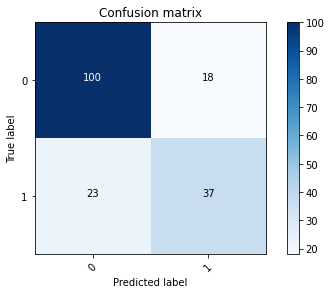

In [34]:
plot_confusion_matrix(cm, classes=[0,1])

#Lecture Notes

In [15]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

input_dim = 784 #28x28
output_dim = num_classes = 10 #number of classes 0-9
batch_size = 128
num_epochs = 20

X_train = X_train.reshape(60000,784).astype('float32')
X_test = X_test.reshape(10000, input_dim).astype('float32')
X_train /= 255
X_test /= 255

y_train = to_categorical(y_train, num_classes)
y_test= to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 0s 0us/step


In [16]:
#@title Hyperparameters

learning_rate = 0.1 #@param {type: 'number'}
optimizer = 'adam' #@param {type:'string'}

In [17]:
print(learning_rate)

0.1


In [19]:
import tensorflow as tf

tf.test.gpu_device_name()

'/device:GPU:0'

In [21]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16320183497064767656, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14638920512
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 14504208164543365665
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [42]:
model = Sequential()

model.add(Dense(1028, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1028, activation='relu'))
model.add(Dense(output_dim, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 1028)              806980    
_________________________________________________________________
dense_22 (Dense)             (None, 1028)              1057812   
_________________________________________________________________
dense_23 (Dense)             (None, 10)                10290     
Total params: 1,875,082
Trainable params: 1,875,082
Non-trainable params: 0
_________________________________________________________________


In [43]:
sgd = SGD(lr=0.5)

In [44]:
model.compile(optimizer=sgd, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [45]:
history = model.fit(X_train, y_train, batch_size=batch_size,
          validation_data = (X_test, y_test),
          epochs=num_epochs, verbose=1)

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.4886 - accuracy: 0.8411 - val_loss: 0.1121 - val_accuracy: 0.9654
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0924 - accuracy: 0.9722 - val_loss: 0.0835 - val_accuracy: 0.9740
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0540 - accuracy: 0.9833 - val_loss: 0.0723 - val_accuracy: 0.9774
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0364 - accuracy: 0.9891 - val_loss: 0.0650 - val_accuracy: 0.9803
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0235 - accuracy: 0.9928 - val_loss: 0.0641 - val_accuracy: 0.9787
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0178 - accuracy: 0.9954 - val_loss: 0.0670 - val_accuracy: 0.9797
Epoch 7/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0110 - accuracy: 0.9975 - val_loss: 0.0566 - val_accuracy: 0.9826
Epoch 

In [46]:
df = pd.DataFrame(history.history)

df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.257476,0.918900,0.112066,0.9654
1,0.087674,0.973267,0.083464,0.9740
2,0.054704,0.982617,0.072288,0.9774
3,0.037319,0.988883,0.064952,0.9803
4,0.025745,0.991867,0.064067,0.9787


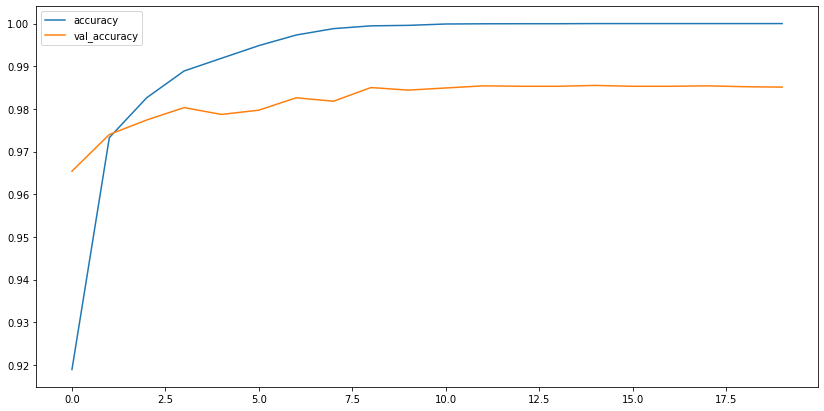

In [48]:
df[['accuracy', 'val_accuracy']].plot(figsize=(14,7))

#elbow of accuracy shows where it peaks out